# Exploratory Data Analysis of Walmart's Sales (2010 - 2012)

Perform exploratory data analysis of Walmart's Sales in the U.S. from January 2010 to October 2012. The data used in the analysis are prepared by the [data wrangling program](https://github.com/nphan20181/walmart_sales/blob/master/00_walmart_data_wrangling.ipynb).

In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import module.global_plot_functions as gp

sns.set()

mpl.rcParams['axes.titlesize'] = 17    # font size for plot title
mpl.rcParams['axes.labelsize'] = 14    # font size for x-axis' and y-axis' label

In [2]:
# load data
stores = pd.read_pickle('out/stores.pkl')
features = pd.read_pickle('out/features.pkl')
sales = pd.read_pickle('out/sales.pkl')
store_sales = pd.read_pickle('out/store_sales.pkl')

## Descriptive Statistics

In [3]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Weekly Sales (Thousand)
0,1,1,2010-02-05,24924.50,False,24.92450
1,1,1,2010-02-12,46039.49,True,46.03949
2,1,1,2010-02-19,41595.55,False,41.59555
3,1,1,2010-02-26,19403.54,False,19.40354
4,1,1,2010-03-05,21827.90,False,21.82790


In [4]:
# weekly sales by store's department
sales['Weekly_Sales'].describe().to_frame()

,Weekly_Sales
count,421570.000000
mean,15981.258123
std,22711.183519
min,-4988.940000
25%,2079.650000
50%,7612.030000
75%,20205.852500
max,693099.360000


In [5]:
stores.head()

,Store,Type,Size,Num of Depts,Total Sales (Million),Total MarkDown (Thousand)
0,1,A,151315,77,222.402809,1651.85875
1,2,A,202307,78,275.382441,2166.05982
2,3,B,37392,72,57.586735,392.59244
3,4,A,205863,78,299.543953,2175.19380
4,5,B,34875,72,45.475689,478.63538


In [6]:
# total sales by Walmart's store
stores['Total Sales (Million)'].describe().to_frame()

,Total Sales (Million)
count,45.000000
mean,149.715977
std,78.167556
min,37.160222
25%,79.565752
50%,138.249763
75%,199.613906
max,301.397792


In [7]:
store_sales.head()

,Store,Date,Weekly Sales (Thousand),Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Total MarkDown,Week,Month,Year,Quarter
0,1,2010-02-05,1643.69090,42.31,2.572,211.096358,8.106,False,NaN,5,2,2010,1
1,1,2010-02-12,1641.95744,38.51,2.548,211.242170,8.106,True,NaN,6,2,2010,1
2,1,2010-02-19,1611.96817,39.93,2.514,211.289143,8.106,False,NaN,7,2,2010,1
3,1,2010-02-26,1409.72759,46.63,2.561,211.319643,8.106,False,NaN,8,2,2010,1
4,1,2010-03-05,1554.80668,46.50,2.625,211.350143,8.106,False,NaN,9,3,2010,1


In [8]:
# weekly sales by Walmart's store
store_sales['Weekly Sales (Thousand)'].describe().to_frame()

,Weekly Sales (Thousand)
count,6435.000000
mean,1046.964878
std,564.366622
min,209.986250
25%,553.350105
50%,960.746040
75%,1420.158660
max,3818.686450


## Data Distribution

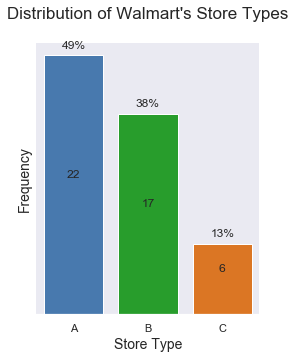

In [9]:
# plot distribution of Store Type

fig, ax = plt.subplots(figsize=(4, 5))

# color pallete for store type
colors = ["windows blue", "green", "orange"]
color_palette = sns.xkcd_palette(colors)

# draw bar plot
_ = sns.countplot(x='Type', data=stores, ax=ax, palette=color_palette)

gp.hide_borders(ax, ['left', 'top', 'right'])
gp.annotate_plot(ax, n=len(stores['Store']))
plt.yticks([])
plt.xlabel('Store Type')
plt.ylabel('Frequency')
plt.title("Distribution of Walmart's Store Types\n")
plt.show()

In [10]:
def barplot_by_rank(df_in, title='', suptitle='', xlabel='', ylabel='',
                    n=10, rank='largest', figsize=(12, 8), annotate=True, hide_yticks=True):
    '''
    Make bar plot and show bars in increasing or decreasing order.
    
    Parameters:
    - df_in: a data frame
    - tile: plot's title
    - suptitle: plot's suptitle
    - xlabel: label for x-axis
    - ylabel: label for y-axis
    - n: number of bars
    - rank: show the bar in descending (largest) or ascending (smallest) order
    - figsize: figure's size
    - annotate: annotate plot (True or False)
    - hide_yticks: hide or show y tick marks & labels (True or False)
    '''
    
    x_col = df_in.columns[0]
    y_col = df_in.columns[1]
    xlabel = x_col if xlabel == '' else xlabel
    ylabel = y_col if ylabel == '' else ylabel
    
    # prepare the data frame and order data in increasing or decreasing values
    if rank == 'largest':
        data = df_in.nlargest(n, y_col)
    else:
        data = df_in.nsmallest(n, y_col)
    
    # create the figure and draw bar plot
    fig, ax = plt.subplots(figsize=(12, 6))
    _ = sns.barplot(x_col, y_col, data=data, order=data[x_col], ax=ax)
    
    # hide borders and annotate plot
    gp.hide_borders(ax, ['left', 'top', 'right'])
    gp.annotate_plot(ax, n=sum(stores[y_col]), pct_precision=2, annotate=annotate)
    
    # hide tick marks and labels for y-axis
    if hide_yticks == True:
        plt.yticks([])
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.suptitle(suptitle, size=14)
    plt.show()

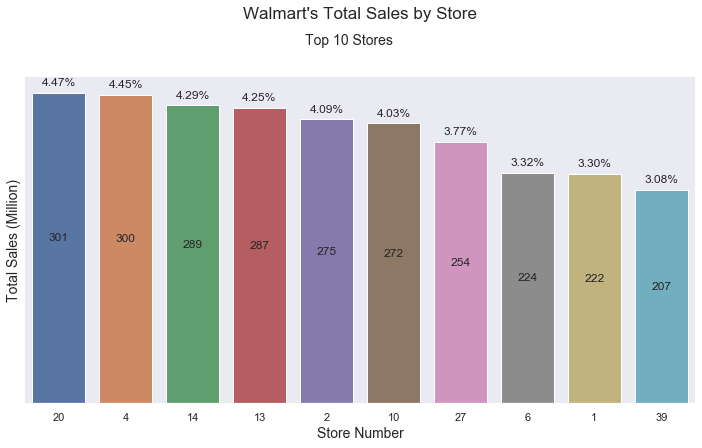

In [11]:
# bar plot of top 10 stores with highest total sales
barplot_by_rank(stores[['Store', 'Total Sales (Million)']], title="Walmart's Total Sales by Store\n\n\n", 
                suptitle='Top 10 Stores', xlabel='Store Number')

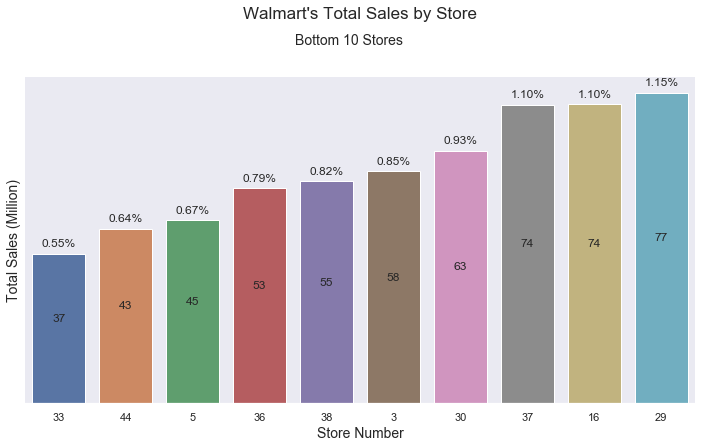

In [12]:
# bar plot of bottom 10 stores with lowest total sales
barplot_by_rank(stores[['Store', 'Total Sales (Million)']], title="Walmart's Total Sales by Store\n\n\n", 
                suptitle='Bottom 10 Stores', xlabel='Store Number', rank='smallest')

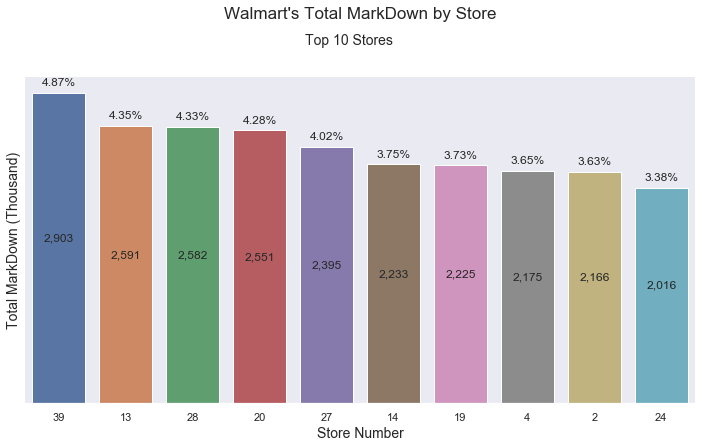

In [13]:
# bar plot of top 10 stores with highest total markdown
barplot_by_rank(stores[['Store', 'Total MarkDown (Thousand)']], title="Walmart's Total MarkDown by Store\n\n\n", 
                suptitle='Top 10 Stores', xlabel='Store Number')

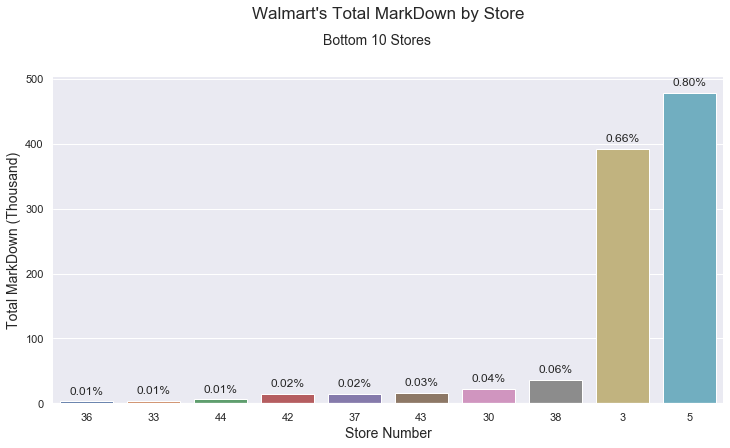

In [14]:
# bar plot of top 10 stores with highest total markdown
barplot_by_rank(stores[['Store', 'Total MarkDown (Thousand)']], title="Walmart's Total MarkDown by Store\n\n\n", 
                suptitle='Bottom 10 Stores', xlabel='Store Number', rank='smallest', annotate=False,
                hide_yticks=False)

In [15]:
# create a data frame for Total Sales by department
dept_sales = sales.groupby(by=['Store', 'Dept'])['Weekly Sales (Thousand)'].sum().to_frame().reset_index()
dept_sales['Total Sales (Million)'] = dept_sales['Weekly Sales (Thousand)'] / 1000
del dept_sales['Weekly Sales (Thousand)']

In [16]:
dept_sales.head()

,Store,Dept,Total Sales (Million)
0,1,1,3.219405
1,1,2,6.592599
2,1,3,1.880518
3,1,4,5.285874
4,1,5,3.468886


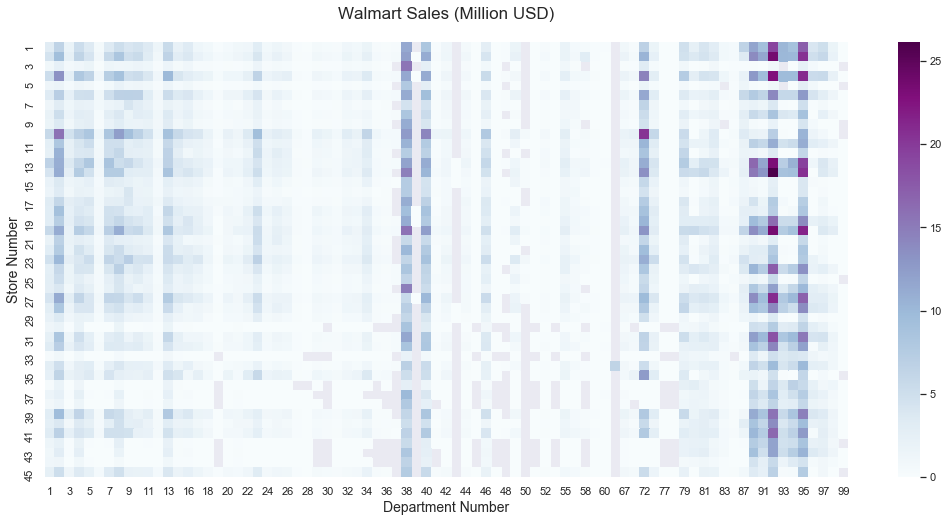

In [17]:
# create a heat map to compare sales across each department in each store
fig, ax = plt.subplots(figsize=(18, 8))
_ = sns.heatmap(dept_sales.pivot(index='Store', columns='Dept', values='Total Sales (Million)'), cmap="BuPu")

plt.xlabel('Department Number')
plt.ylabel('Store Number')
plt.title('Walmart Sales (Million USD)\n')
plt.show()

## Relationship Between Variables

In [18]:
def scatterplot(df_in, title='', xlabel='', ylabel='', figsize=(8, 6)):
    '''
    Make a scatter plot of x vs. y
    
    Parameters:
    - df_in: a data frame
    - title: plot's title
    - xlabel: label for x-axis
    - ylabel: label for y-axis
    - figsize: figure's size
    '''
    
    # create figure
    fig, ax = plt.subplots(figsize=figsize)
    
    X = df_in[df_in.columns[0]]   # X data is the first column of data frame
    Y = df_in[df_in.columns[1]]   # Y data is the second column of data frame
    
    # draw scatter plot of X vs. Y
    _ = sns.scatterplot(x=X, y=Y, hue=df_in[df_in.columns[2]], s=90, ax=ax)
    
    # compute correlation
    corr = round(X.corr(Y), 4)
    
    # hide borders and show legend
    gp.hide_borders(ax, ['top', 'right'])
    plt.legend(loc='best', frameon=False)
    
    # set label for x-axis
    if xlabel == '':
        plt.xlabel(df_in.columns[0])
    else:
        plt.xlabel(xlabel)
    
    # set label for y-axis
    if ylabel == '':
        plt.ylabel(df_in.columns[1])
    else:
        plt.ylabel(ylabel)
    
    # set plot's title and suptitle
    plt.title(title)
    plt.suptitle(df_in.columns[0] + ' vs. ' + df_in.columns[1] + \
                 '\nCorrelation: ' + str(corr), size=14)
    plt.show()

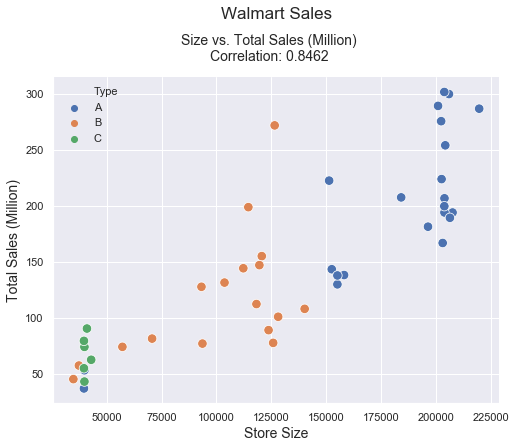

In [19]:
scatterplot(stores[['Size', 'Total Sales (Million)', 'Type']], title='Walmart Sales\n\n\n', xlabel='Store Size')

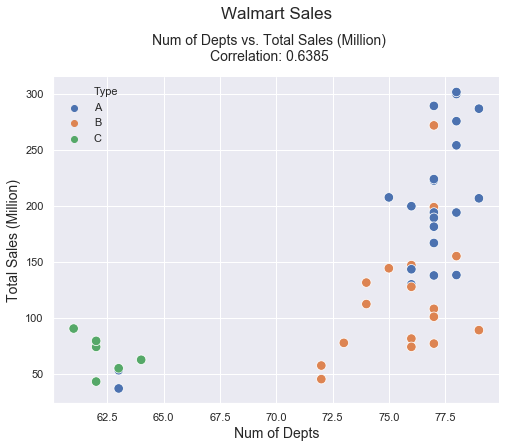

In [20]:
scatterplot(stores[['Num of Depts', 'Total Sales (Million)', 'Type']], title='Walmart Sales\n\n\n')

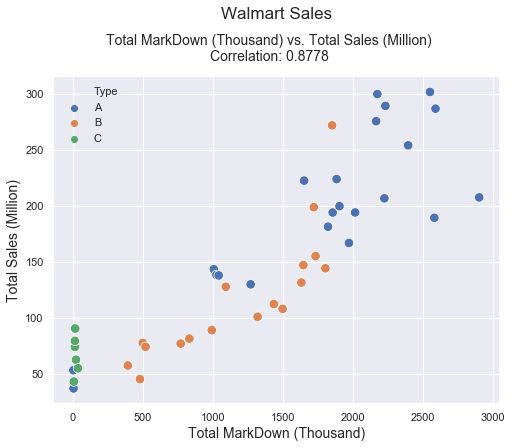

In [21]:
scatterplot(stores[['Total MarkDown (Thousand)', 'Total Sales (Million)', 'Type']], title='Walmart Sales\n\n\n')

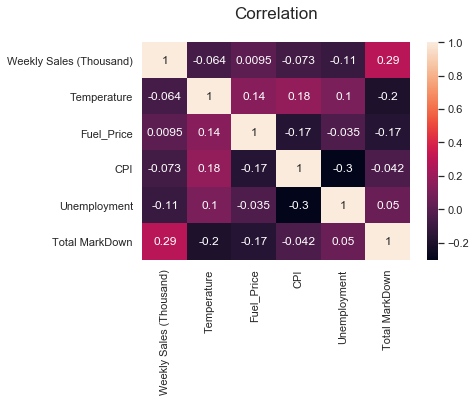

In [22]:
# create a heat map of correlation
_ = sns.heatmap(store_sales[['Weekly Sales (Thousand)', 'Temperature', 'Fuel_Price', 'CPI', \
                             'Unemployment', 'Total MarkDown']].corr(), annot=True)

plt.title('Correlation\n')
plt.show()